In [78]:
from obspy import read
from obspy.signal.trigger import ar_pick
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
st1 = read('loc_RJOB20050801145719850.e.gse2')
st2 = read('loc_RJOB20050801145719850.n.gse2')
st3 = read('loc_RJOB20050801145719850.z.gse2')

threechannels = read('loc_RJOB20050801145719850.e.gse2')
threechannels += read('loc_RJOB20050801145719850.n.gse2')
threechannels += read('loc_RJOB20050801145719850.z.gse2')

C:\Program Files\Anaconda3\lib\site-packages\obspy\io\gse2\libgse2.py:327: UserWarning: Checksum differs only in absolute value. If this file was written with ObsPy GSE2, this is due to a bug in the obspy.io.gse2.write routine (resolved with [3431]), and thus this message can be safely ignored.
  warnings.warn(msg, UserWarning)


In [80]:
data = st[0].data
npts = st[0].stats.npts
samprate = st[0].stats.sampling_rate

In [81]:
tr1 = st1[0]

In [82]:
data_envelope = obspy.signal.filter.envelope(st[0].data)

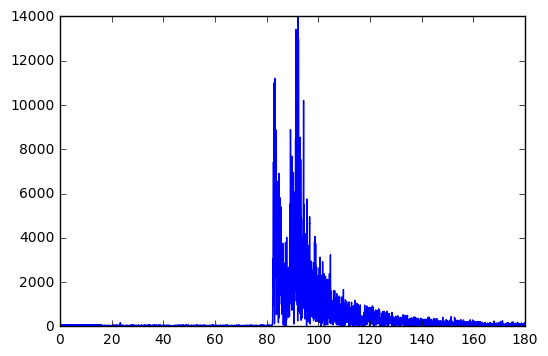

In [83]:
# The plotting, plain matplotlib
t = np.arange(0, npts/samprate, 1 / samprate)
plt.plot(t, data_envelope)

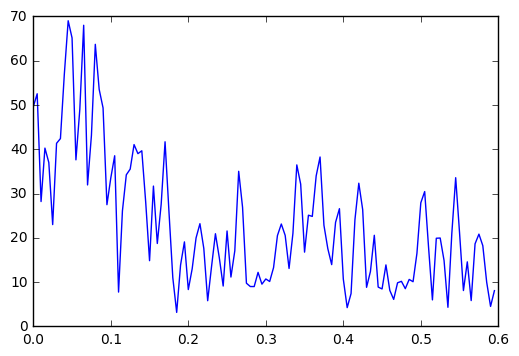

In [86]:
#p[6068:6188]

t2 = np.arange(0, 120/samprate, 1 / samprate)
plt.plot(t2,data_envelope[6068:6188])